# Inserção das Mulheres na área de TI nos últimos 10 anos

Análise de dados do número de mulheres versus o número de homens que entram nos cursos da área de Tecnologia da Informação (TI).

In [1]:
#importando os módulos
import pandas as pd
low_memory=False

In [2]:
#Leitura do dataset utilizado na análise
df = pd.read_csv(r'df2009_df2018.csv', delimiter=',')

In [3]:
#Visualização das 5 primeiras linhas do dataset
df.head()

,IDADE,ANO,SEXO,CURSO
0,29,2009,Masculino,ANALISE E DESENVOLVIMENTO DE SISTEMAS
1,21,2009,Masculino,ANALISE E DESENVOLVIMENTO DE SISTEMAS
2,20,2009,Masculino,COMPUTACAO
3,41,2009,Masculino,ANALISE E DESENVOLVIMENTO DE SISTEMAS
4,18,2009,Masculino,INFORMATICA


In [4]:
df.shape

(1217117, 4)

In [5]:
#Agrupamento da mediana - por sexo e idade
df.groupby('SEXO')['IDADE'].median()

SEXO
Feminino     25
Masculino    25
Name: IDADE, dtype: int64

In [6]:
#Agrupamento da média - por sexo e idade
df.groupby('SEXO')['IDADE'].mean()

SEXO
Feminino     26.613892
Masculino    27.164551
Name: IDADE, dtype: float64

In [7]:
#filtro dos dados por sexo
masc = df[df['SEXO'] == 'Masculino'] 
femi = df[df['SEXO'] == 'Feminino']

In [8]:
#Moda da idade dos homens
masc.mode()

,IDADE,ANO,SEXO,CURSO
0,21,2018,Masculino,ANALISE E DESENVOLVIMENTO DE SISTEMAS


In [9]:
#Moda da idade das mulheres
femi.mode()

,IDADE,ANO,SEXO,CURSO
0,20,2018,Feminino,ANALISE E DESENVOLVIMENTO DE SISTEMAS


In [10]:
#importando módulos
import matplotlib.pyplot as plt
%matplotlib inline

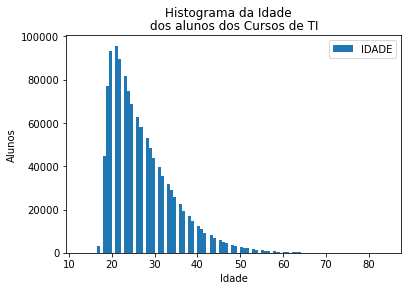

In [11]:
#Histograma da idade 
df['IDADE'].plot(kind = 'hist', bins = 100)
plt.suptitle("Histograma da Idade")
plt.title("dos alunos dos Cursos de TI")
plt.xlabel('Idade');
plt.ylabel('Alunos');
plt.legend();

# Visualização dos Dados

#### Gráfico 'Inserção Mulheres x Homens no Curso de TI entre os anos de 2009 a 2018 no Brasil'
No eixo x temos os anos e no eixo y o número de alunos por sexo.

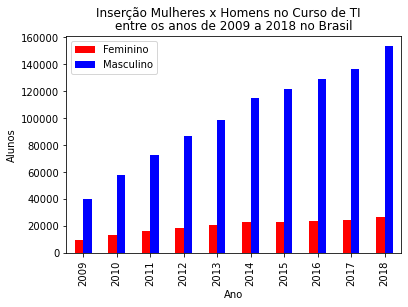

In [12]:
#Cruzamento dos dados do ano e sexo
curso_ano = pd.crosstab(df['ANO'],df['SEXO'])

#plotar o gráfico
curso_ano.plot(kind='bar',width=0.5, color=['red','blue'], grid=False)
plt.suptitle("Inserção Mulheres x Homens no Curso de TI")
plt.title("entre os anos de 2009 a 2018 no Brasil")
plt.xlabel('Ano');
plt.ylabel('Alunos');
plt.legend();

In [13]:
print(curso_ano)

SEXO  Feminino  Masculino
ANO                      
2009     10164      40309
2010     13887      58140
2011     16777      73014
2012     19052      86917
2013     20876      98899
2014     23483     115072
2015     23559     121969
2016     23639     129352
2017     24430     136797
2018     27247     153534


In [14]:
#Porcentagem do cruzamento do ano e sexo
curso_ano_per = pd.crosstab(df['ANO'],df['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100
print(curso_ano_per)

SEXO   Feminino  Masculino
ANO                       
2009  20.137499  79.862501
2010  19.280270  80.719730
2011  18.684501  81.315499
2012  17.978843  82.021157
2013  17.429347  82.570653
2014  16.948504  83.051496
2015  16.188637  83.811363
2016  15.451236  84.548764
2017  15.152549  84.847451
2018  15.071827  84.928173


In [15]:
#Criação de séries com os resultados do cruzamento dos dados acima
per_2009 = pd.Series({'Ano':2009, 'Feminino':20.13, 'Masculino':79.87})
per_2010 = pd.Series({'Ano':2010, 'Feminino':19.28, 'Masculino':80.72})
per_2011 = pd.Series({'Ano':2011, 'Feminino':18.68, 'Masculino':81.32})
per_2012 = pd.Series({'Ano':2012, 'Feminino':17.97, 'Masculino':82.03})
per_2013 = pd.Series({'Ano':2013, 'Feminino':17.43, 'Masculino':82.57})
per_2014 = pd.Series({'Ano':2014, 'Feminino':16.94, 'Masculino':83.06})
per_2015 = pd.Series({'Ano':2015, 'Feminino':16.20, 'Masculino':83.80})
per_2016 = pd.Series({'Ano':2016, 'Feminino':15.45, 'Masculino':84.55})
per_2017 = pd.Series({'Ano':2017, 'Feminino':15.15, 'Masculino':84.85})
per_2018 = pd.Series({'Ano':2019, 'Feminino':15.07, 'Masculino':84.93})

In [16]:
#concatenação das séries em um dataframe
df_per = pd.DataFrame([per_2009, per_2010, per_2011, per_2012, per_2013, per_2014,
                       per_2015, per_2016, per_2017, per_2018])

In [17]:
#Correlação dos dados
df_per.corr()

,Ano,Feminino,Masculino
Ano,1.000000,-0.979503,0.979503
Feminino,-0.979503,1.000000,-1.000000
Masculino,0.979503,-1.000000,1.000000


In [18]:
#Covariância dos dados
df_per.cov()

,Ano,Feminino,Masculino
Ano,10.266667,-5.595556,5.595556
Feminino,-5.595556,3.178667,-3.178667
Masculino,5.595556,-3.178667,3.178667


In [19]:
#importando módulo
import statsmodels.api as sm

In [20]:
#Seta os valores de X e Y
X = df_per['Ano'].values
Y = df_per['Feminino'].values

In [21]:
#Treinamento do modelo
modelo = sm.OLS(Y, X)
resultado = modelo.fit()
#O statsmodels não adiciona automaticamente a constante (β0) ao modelo, portanto precisa adicionar essa constante:
X = sm.add_constant(X)

In [22]:
#Treinamento do novo modelo agora com a adição do Intercepto (β0)
modelo2 = sm.OLS(Y, X)
resultado2 = modelo2.fit()

In [23]:
#Atribuindo o coeficiente linear e coeficiente angular em variáveis para ajustar a reta.
coef_linear, coef_angular = resultado2.params
reta = coef_angular*X+coef_linear

#Ao adicionar a constante, uma nova coluna é adicionada[1].
X = X[:,1]
reta = reta[:,1]

In [24]:
#importando os módulos
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [25]:
#Fazer a regressão polinomial grau 2
caracteristicas_2= PolynomialFeatures(degree=2)
#Colocar no padrão que a biblioteca requere (para tirar as colunas, agora será só linha)
X = X.reshape(-1, 1)
#linearizar o meu X e ajustar aos novos valores
X_Polinomio_2 = caracteristicas_2.fit_transform(X)

In [26]:
#Lineariza o polinomio
modelo2 = LinearRegression()
modelo2.fit(X_Polinomio_2, Y)
Y_Polinomio_2 = modelo2.predict(X_Polinomio_2)

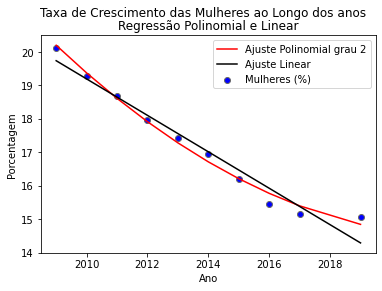

In [27]:
plt.suptitle("Taxa de Crescimento das Mulheres ao Longo dos anos")
plt.title("Regressão Polinomial e Linear")
plt.scatter(X,Y,color='b',edgecolors="dimgray", label='Mulheres (%)');
plt.plot(X,Y_Polinomio_2,color='r',label='Ajuste Polinomial grau 2');
plt.plot(X,reta,label='Ajuste Linear',color='k');
plt.xlabel('Ano');
plt.ylabel('Porcentagem');
plt.legend();

In [28]:
#importando módulo
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [29]:
#Erro Absoluto Médio (MAE)
MAE = mean_absolute_error(Y,reta) #Regressão Linear
MAE2 = mean_absolute_error(Y,Y_Polinomio_2) #Regressão Polinomial


In [30]:
#Raiz do erro quadrático médio 
RMSE = np.sqrt(mean_squared_error(Y,reta)) #Regressão Linear
RMSE2 = np.sqrt(mean_squared_error(Y,Y_Polinomio_2)) #Regressão Polinomial

In [31]:
print("MAE = {:0.2f}".format(MAE))
print("MAE (grau=2) = {:0.4f}".format(MAE2))

print("RMSE = {:0.2f}".format(RMSE))
print("RMSE (grau=2) = {:0.4f}".format(RMSE2))

MAE = 0.26
MAE (grau=2) = 0.1470
RMSE = 0.34
RMSE (grau=2) = 0.1763


In [32]:
#R-quadrado da Regressão Linear
#Observação: O comando summary() imprime várias métricas e coeficientes estatísticos, porém, só foi utilizado o r2.
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     189.2
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           7.53e-07
Time:                        18:24:13   Log-Likelihood:                -3.4216
No. Observations:                  10   AIC:                             10.84
Df Residuals:                       8   BIC:                             11.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1114.6856     79.791     13.970      0.0

/home/ariana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [33]:
#importando módulo
from sklearn.metrics import r2_score

In [34]:
#R-quadrado da Regressão Polinomial
r2_1 = r2_score(Y,Y_Polinomio_2)
print("R2 (Grau 2) = ",r2_1)

R2 (Grau 2) =  0.9891351276136174


In [35]:
#Seta os valores de X e Y
X = df_per['Ano'].values
Y = df_per['Masculino'].values

In [36]:
#Treinamento do modelo
modelo = sm.OLS(Y, X)
resultado = modelo.fit()
X = sm.add_constant(X)

In [37]:
modelo2 = sm.OLS(Y, X)
resultado2 = modelo2.fit()
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     189.2
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           7.53e-07
Time:                        18:24:13   Log-Likelihood:                -3.4216
No. Observations:                  10   AIC:                             10.84
Df Residuals:                       8   BIC:                             11.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1014.6856     79.791    -12.717      0.0

/home/ariana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [38]:
coef_linear, coef_angular = resultado2.params
reta = coef_angular*X+coef_linear
X = X[:,1]
reta = reta[:,1]

In [39]:
caracteristicas_2= PolynomialFeatures(degree=2)
X = X.reshape(-1, 1)
X_Polinomio_2 = caracteristicas_2.fit_transform(X)

In [40]:
modelo2 = LinearRegression()
modelo2.fit(X_Polinomio_2, Y)
Y_Polinomio_2 = modelo2.predict(X_Polinomio_2)

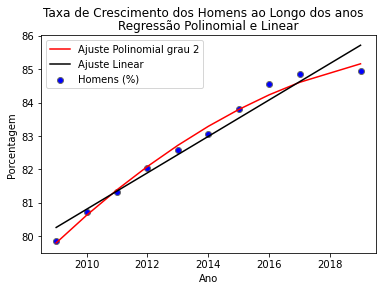

In [41]:
plt.suptitle("Taxa de Crescimento dos Homens ao Longo dos anos")
plt.title("Regressão Polinomial e Linear")
plt.scatter(X,Y,color='b',edgecolors="dimgray", label='Homens (%)');
plt.plot(X,Y_Polinomio_2,color='r',label='Ajuste Polinomial grau 2');
plt.plot(X,reta,label='Ajuste Linear',color='k');
plt.xlabel('Ano');
plt.ylabel('Porcentagem');
plt.legend();

In [42]:
MAE = mean_absolute_error(Y,reta)
MAE2 = mean_absolute_error(Y,Y_Polinomio_2)
RMSE = np.sqrt(mean_squared_error(Y,reta))
RMSE2 = np.sqrt(mean_squared_error(Y,Y_Polinomio_2))

print("MAE = {:0.2f}".format(MAE))
print("MAE (grau=2) = {:0.4f}".format(MAE2))

print("RMSE = {:0.2f}".format(RMSE))
print("RMSE (grau=2) = {:0.4f}".format(RMSE2))

MAE = 0.26
MAE (grau=2) = 0.1470
RMSE = 0.34
RMSE (grau=2) = 0.1763


In [43]:
#R-quadrado
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     189.2
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           7.53e-07
Time:                        18:24:14   Log-Likelihood:                -3.4216
No. Observations:                  10   AIC:                             10.84
Df Residuals:                       8   BIC:                             11.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1014.6856     79.791    -12.717      0.0

/home/ariana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [44]:
r2_1 = r2_score(Y,Y_Polinomio_2)
print("R2 (Grau 2) = ",r2_1)

R2 (Grau 2) =  0.9891351276140968


In [45]:
#Salva o novo dataframe em .csv
df_per.to_csv('df_per.csv', index=False)